In [1]:
from lifelines import CoxPHFitter 
import xenaPython as xena
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/campus.stonybrook.edu/pdutta/anaconda3/envs/stratified_subsampling/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/campus.stonybrook.edu/pdutta/anaconda3/envs/stratified_subsampling/lib/python3.8/site-packages/xenaPython/__init__.py:110: FutureWarning: Possible nested set at position 7
  re.sub(r"^[^[]+[[]([^]]*)[]].*$", r"\1", query, flags=re.DOTALL))


In [2]:
INPUT_PATH= "/data/projects/shared_data/collab_data/subsample/boxplot_data"
INPUT_FILENAME = "lgg_gbm_gtex.csv"

In [3]:
df = pd.read_csv(INPUT_PATH+"/"+INPUT_FILENAME, sep= ",", decimal=',')
df = df.rename(columns={'transcript': 'sample'})
df= df.set_index('sample')
df = df.transpose()
df = df.astype(float)
# df = df.reset_index(drop=True)
# df = df.rename(columns={'index': 'sample'})
# df  =df.set_index('sample')
df

sample,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1
GTEX-1117F-3226-SM-5N9CT,1.599324,5.216861,0.000000,-2.251554,0.000000,0.000000,0.000000,3.003620,4.645542,0.028586
GTEX-111FC-3126-SM-5GZZ2,2.678075,6.009678,0.000000,-0.454075,0.000000,-2.836468,0.000000,4.376431,5.145659,2.189084
GTEX-111FC-3326-SM-5GZYV,3.725791,6.399983,0.000000,0.782361,0.000000,-3.058872,0.000000,4.232623,5.279463,2.845999
GTEX-1128S-2726-SM-5H12C,2.195385,5.493468,-2.251554,0.000000,0.000000,-4.058846,0.000000,3.297153,4.724145,0.650781
GTEX-1128S-2826-SM-5N9DI,3.303054,5.830575,-1.514616,-0.836474,0.000000,0.000000,0.000000,2.735483,5.274963,1.097626
...,...,...,...,...,...,...,...,...,...,...
TCGA-WY-A85A-01,1.739868,7.130290,0.000000,3.902104,3.092531,-2.321895,0.000000,4.373630,6.372383,1.361739
TCGA-WY-A85B-01,1.867905,7.508792,0.000000,4.313227,1.459475,-2.120259,0.000000,5.446967,6.724786,2.010742
TCGA-WY-A85C-01,2.336314,7.071789,0.000000,2.634568,3.570479,-3.473942,-1.999959,4.633442,6.327282,1.959729
TCGA-WY-A85D-01,1.761274,7.334291,0.000000,3.100932,-0.234496,-3.058872,0.000000,4.294226,6.816687,2.422231


In [4]:
df.index

Index(['GTEX-1117F-3226-SM-5N9CT', 'GTEX-111FC-3126-SM-5GZZ2',
       'GTEX-111FC-3326-SM-5GZYV', 'GTEX-1128S-2726-SM-5H12C',
       'GTEX-1128S-2826-SM-5N9DI', 'GTEX-117XS-3026-SM-5N9CA',
       'GTEX-117XS-3126-SM-5GIDP', 'GTEX-1192X-3126-SM-5N9BY',
       'GTEX-1192X-3226-SM-5987D', 'GTEX-11DXW-1026-SM-5H11K',
       ...
       'TCGA-VW-A8FI-01', 'TCGA-W9-A837-01', 'TCGA-WH-A86K-01',
       'TCGA-WY-A858-01', 'TCGA-WY-A859-01', 'TCGA-WY-A85A-01',
       'TCGA-WY-A85B-01', 'TCGA-WY-A85C-01', 'TCGA-WY-A85D-01',
       'TCGA-WY-A85E-01'],
      dtype='object', length=1810)

In [5]:
df_pheno = pd.read_csv("/data/projects/shared_data/collab_data/subsample/boxplot_data/lgg_gbm_gtex_pheno.csv", sep= ",")
df['sample_group'] = df_pheno['status'].to_list()

In [6]:
df

sample,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1,sample_group
GTEX-1117F-3226-SM-5N9CT,1.599324,5.216861,0.000000,-2.251554,0.000000,0.000000,0.000000,3.003620,4.645542,0.028586,gtex_brain
GTEX-111FC-3126-SM-5GZZ2,2.678075,6.009678,0.000000,-0.454075,0.000000,-2.836468,0.000000,4.376431,5.145659,2.189084,gtex_brain
GTEX-111FC-3326-SM-5GZYV,3.725791,6.399983,0.000000,0.782361,0.000000,-3.058872,0.000000,4.232623,5.279463,2.845999,gtex_brain
GTEX-1128S-2726-SM-5H12C,2.195385,5.493468,-2.251554,0.000000,0.000000,-4.058846,0.000000,3.297153,4.724145,0.650781,gtex_brain
GTEX-1128S-2826-SM-5N9DI,3.303054,5.830575,-1.514616,-0.836474,0.000000,0.000000,0.000000,2.735483,5.274963,1.097626,gtex_brain
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WY-A85A-01,1.739868,7.130290,0.000000,3.902104,3.092531,-2.321895,0.000000,4.373630,6.372383,1.361739,lgg
TCGA-WY-A85B-01,1.867905,7.508792,0.000000,4.313227,1.459475,-2.120259,0.000000,5.446967,6.724786,2.010742,lgg
TCGA-WY-A85C-01,2.336314,7.071789,0.000000,2.634568,3.570479,-3.473942,-1.999959,4.633442,6.327282,1.959729,lgg
TCGA-WY-A85D-01,1.761274,7.334291,0.000000,3.100932,-0.234496,-3.058872,0.000000,4.294226,6.816687,2.422231,lgg


In [10]:
df_lgg = df[df['sample_group']=='lgg']

In [11]:
df_lgg

sample,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1,sample_group
TCGA-CS-4938-01,-0.535289,7.287391,0.000000,3.295753,5.140759,-2.251554,0.000000,5.447267,6.372283,0.286918,lgg
TCGA-CS-4941-01,1.182665,7.496892,-2.643889,4.993255,5.716173,-1.152002,0.000000,4.319028,5.877475,-0.810929,lgg
TCGA-CS-4942-01,0.111065,7.504592,-2.736986,4.189021,6.135879,-1.089266,0.000000,5.159860,6.019678,-0.915919,lgg
TCGA-CS-4943-01,-0.000042,7.678893,0.000000,4.355430,6.211181,-3.643821,0.000000,5.239162,6.039178,-0.340125,lgg
TCGA-CS-4944-01,-0.434448,7.117390,0.000000,2.422231,0.000000,-4.321970,0.000000,3.058327,6.009478,-1.943438,lgg
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WY-A85A-01,1.739868,7.130290,0.000000,3.902104,3.092531,-2.321895,0.000000,4.373630,6.372383,1.361739,lgg
TCGA-WY-A85B-01,1.867905,7.508792,0.000000,4.313227,1.459475,-2.120259,0.000000,5.446967,6.724786,2.010742,lgg
TCGA-WY-A85C-01,2.336314,7.071789,0.000000,2.634568,3.570479,-3.473942,-1.999959,4.633442,6.327282,1.959729,lgg
TCGA-WY-A85D-01,1.761274,7.334291,0.000000,3.100932,-0.234496,-3.058872,0.000000,4.294226,6.816687,2.422231,lgg


In [4]:
CANCER="GBM"

In [5]:
host = xena.PUBLIC_HUBS['tcgaHub']
dataset = 'survival/{}_survival.txt'.format(CANCER)
samples = xena.dataset_samples (host, dataset, None)
features = xena.dataset_field(host, dataset)
print(features)
[position, [status,time]] = xena.dataset_probe_values(host, dataset, samples, ['OS','OS.time'])
df_status = pd.DataFrame(list(zip(samples, time, status)), columns = ['sample','time', 'status'])
df_status = df_status.set_index('sample')
df_status = df_status[df_status['time'] !=0]
print(df_status.shape)
df_status = df_status.replace('NaN', np.nan)
df_status = df_status.dropna()

['DFI', 'DFI.time', 'DSS', 'DSS.time', 'OS', 'OS.time', 'PFI', 'PFI.time', 'Redaction', '_PATIENT', 'sampleID']
(601, 2)


In [6]:
df_status

,time,status
sample,,
TCGA-02-0001-01,358,1
TCGA-02-0003-01,144,1
TCGA-02-0006-01,558,1
TCGA-02-0007-01,705,1
TCGA-02-0009-01,322,1
...,...,...
TCGA-81-5911-01,539,0
TCGA-87-5896-01,800,0
TCGA-OX-A56R-01,180,1


In [15]:
#print(df_status.shape, df_gbm.shape)
#df_merge = pd.merge(df_gbm, df_status, on='sample')
df_merge = df_gbm.merge(df_status, left_index=True, right_index=True)
df_merge.head()
#df_merge.shape
#print(df_merge.groupby(['status']).size())

,ENST00000461347.5,ENST00000322723.8,ENST00000484328.1,ENST00000454824.5,ENST00000417652.5,ENST00000453992.5,ENST00000436894.1,ENST00000494618.1,ENST00000356936.5,ENST00000466274.1,sample_group,time,status
TCGA-CS-4938-01,-0.535289,7.287391,0.000000,3.295753,5.140759,-2.251554,0.0,5.447267,6.372283,0.286918,lgg,3574.0,0
TCGA-CS-4941-01,1.182665,7.496892,-2.643889,4.993255,5.716173,-1.152002,0.0,4.319028,5.877475,-0.810929,lgg,234.0,1
TCGA-CS-4942-01,0.111065,7.504592,-2.736986,4.189021,6.135879,-1.089266,0.0,5.159860,6.019678,-0.915919,lgg,1335.0,1
TCGA-CS-4943-01,-0.000042,7.678893,0.000000,4.355430,6.211181,-3.643821,0.0,5.239162,6.039178,-0.340125,lgg,1106.0,1
TCGA-CS-4944-01,-0.434448,7.117390,0.000000,2.422231,0.000000,-4.321970,0.0,3.058327,6.009478,-1.943438,lgg,1828.0,0


In [16]:
s = df_merge['ENST00000322723.8']
val_list_3= s.quantile([.33, .66]).values.tolist()
val_list_2= s.quantile([.5]).values.tolist()

In [17]:
def group_3(row, val_list):
    if row['ENST00000322723.8'] < val_list[0]:
        return 0
    elif val_list[0] <= row['ENST00000322723.8'] < val_list[1]:
        return 1
    elif val_list[1] <= row['ENST00000322723.8']:
        return 2
def group_2(row, val_list):
    if row['ENST00000322723.8'] < val_list[0]:
        return 0
    else:
        return 1
    

In [18]:
df_ENST = df_merge[['ENST00000322723.8', 'time', 'status']]
df_ENST['two_group'] = df_ENST.apply(lambda row: group_2(row, val_list_2), axis=1)
df_ENST['three_group'] = df_ENST.apply(lambda row: group_3(row, val_list_3), axis=1)
# display(df.head())
df_ENST

/tmp/ipykernel_253006/3959774928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ENST['two_group'] = df_ENST.apply(lambda row: group_2(row, val_list_2), axis=1)
/tmp/ipykernel_253006/3959774928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ENST['three_group'] = df_ENST.apply(lambda row: group_3(row, val_list_3), axis=1)


,ENST00000322723.8,time,status,two_group,three_group
TCGA-CS-4938-01,7.287391,3574.0,0,0,1
TCGA-CS-4941-01,7.496892,234.0,1,1,2
TCGA-CS-4942-01,7.504592,1335.0,1,1,2
TCGA-CS-4943-01,7.678893,1106.0,1,1,2
TCGA-CS-4944-01,7.117390,1828.0,0,0,0
...,...,...,...,...,...
TCGA-WY-A85A-01,7.130290,1320.0,0,0,0
TCGA-WY-A85B-01,7.508792,1393.0,0,1,2
TCGA-WY-A85C-01,7.071789,1426.0,0,0,0
TCGA-WY-A85D-01,7.334291,1147.0,0,0,1


In [19]:
df_ENST.groupby('three_group').size()

three_group
0    166
1    166
2    172
dtype: int64

Text(0.5, 1.0, 'KM Plot for cluster number =2\n[pvalue: 0.3037829525880005]')

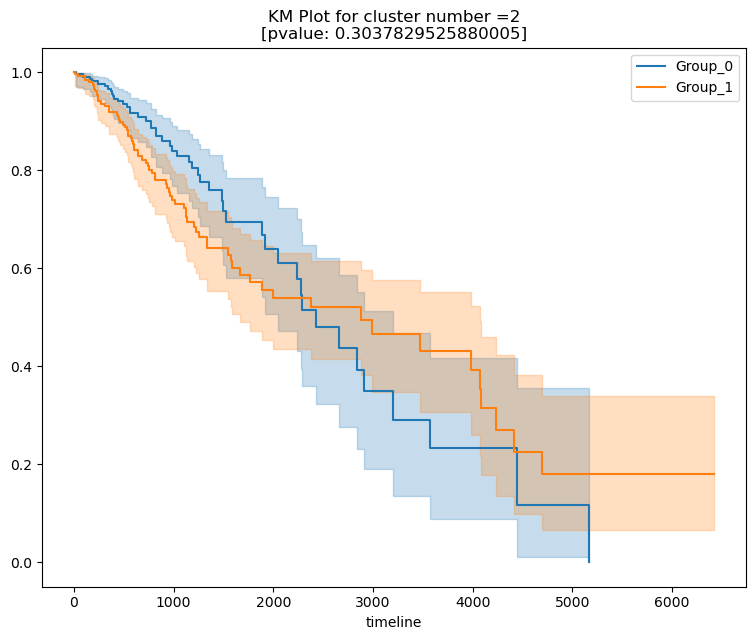

In [21]:
plt.figure(figsize=(20,7))
kmf = KaplanMeierFitter()
k=2
ax = plt.subplot(1, 2, k - 1)
for i in range(k):
    col_name = 'two_group'
    T =  df_ENST[df_ENST[col_name]==i]['time'].to_list()
    E =  df_ENST[ df_ENST[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_ENST['time'], df_ENST[col_name], df_ENST['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k)+"\n[pvalue: {}]".format(result.p_value))

In [22]:
df_ENST_quartile = df_ENST[df_ENST['three_group']!=1 ]
df_ENST_quartile

,ENST00000322723.8,time,status,two_group,three_group
TCGA-CS-4941-01,7.496892,234.0,1,1,2
TCGA-CS-4942-01,7.504592,1335.0,1,1,2
TCGA-CS-4943-01,7.678893,1106.0,1,1,2
TCGA-CS-4944-01,7.117390,1828.0,0,0,0
TCGA-CS-5393-01,7.088189,1222.0,0,0,0
...,...,...,...,...,...
TCGA-WH-A86K-01,6.798987,405.0,0,0,0
TCGA-WY-A858-01,6.608785,1337.0,0,0,0
TCGA-WY-A85A-01,7.130290,1320.0,0,0,0
TCGA-WY-A85B-01,7.508792,1393.0,0,1,2


0
2


Text(0.5, 1.0, 'KM Plot for cluster number =3\n[pvalue: 0.32831028915015426]')

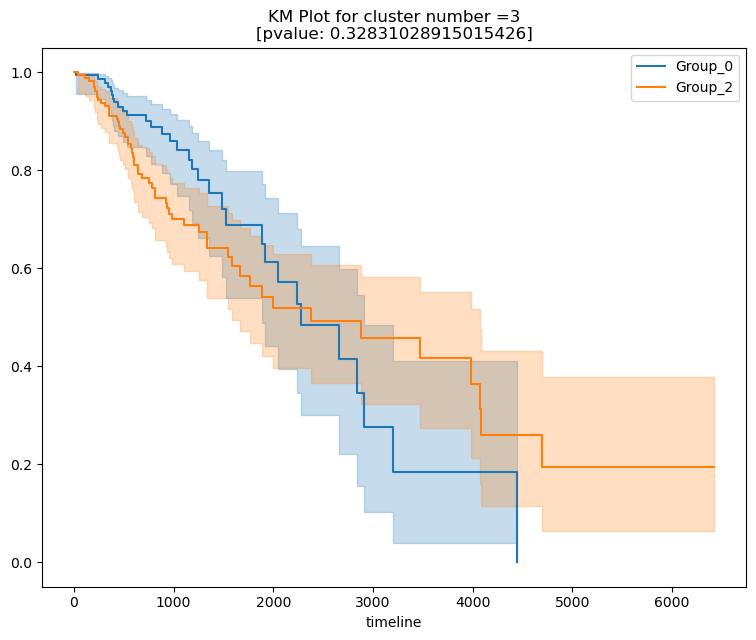

In [23]:
plt.figure(figsize=(20,7))
k=3
ax = plt.subplot(1, 2, k - 1)
for i in [0,2]:
    print(i)
    col_name = 'three_group'
    T =  df_ENST_quartile[df_ENST_quartile[col_name]==i]['time'].to_list()
    E =  df_ENST_quartile[df_ENST_quartile[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_ENST_quartile['time'], df_ENST_quartile[col_name], df_ENST_quartile['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k)+"\n[pvalue: {}]".format(result.p_value))